# Importing Libraries and Loading the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
import cv2
import random
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import layers, models, optimizers
from keras.models import load_model

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-detection-data/without_mask/Faceimg907.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg542.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg569.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg457.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,449.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg967.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg13.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,824.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,645.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,743.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg650.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,342.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,518.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg985.jpg
/kaggle/input/face-mask-detection-data/without_mask

In [2]:
mask_dir = '../input/face-mask-detection-data/with_mask'
no_mask_dir = '../input/face-mask-detection-data/without_mask'
mask_img = [f'{mask_dir}/{i}' for i in os.listdir(mask_dir)]
no_mask_img = [f'{no_mask_dir}/{i}' for i in os.listdir(no_mask_dir)]

In [3]:
print("Total number of images with mask: " + str(len(mask_img)))
print("Total number of images without mask: " + str(len(no_mask_img)))
print("Total images: " + str(len(mask_img) + len(no_mask_img)))

Total number of images with mask: 1915
Total number of images without mask: 1918
Total images: 3833


# Splitting the data

In [4]:
tr_mask = mask_img[0:1499]
tr_no_mask = no_mask_img[0:1499]
test_mask = mask_img[1500:]
test_no_mask = no_mask_img[1500:]


In [5]:
train_img = tr_mask + tr_no_mask
test_img = test_mask + test_no_mask

# Pre-Processing the data

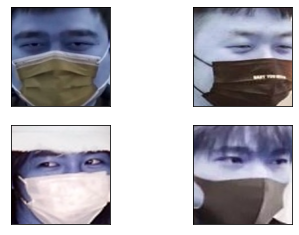

In [6]:

def process_imgs(imgs, width=150, height=150):
    x = []
    y = []
    for i in imgs:
        x.append(cv2.resize(cv2.imread(i, cv2.IMREAD_COLOR), (width, height), interpolation=cv2.INTER_CUBIC))
        label = 1 if 'without' in i else 0
        y.append(label)
    return np.array(x), np.array(y)

tr_x, tr_y = process_imgs(train_img)
test_x, test_y = process_imgs(test_img)

# plot 4 images just to see the results of processing the images
for i in range(4) :
    plt.subplot(2,2,i + 1)
    plt.imshow(tr_x[i])
    plt.xticks([])
    plt.yticks([])
plt.show() 

# Performing Image Augumentation

In [7]:
tr_data = ImageDataGenerator(rescale=1/255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

tr_gen = tr_data.flow(tr_x, tr_y, batch_size=32)
test_gen = tr_data.flow(test_x, test_y, batch_size = 32)

# Building First Model (Without Transfer Learning)

In [8]:
model1 = models.Sequential()
model1.add(Conv2D(64, (1, 1), input_shape = (150,150,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (1, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(2, activation='softmax'))

2021-12-05 11:12:00.698664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 11:12:00.790929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 11:12:00.791619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 11:12:00.792751: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       8320      
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               184320256 
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 184,329,346
Trainable params: 184,329,346
Non-trainable params: 0
__________________________________________

# Compiling and fitting the model

In [10]:
batch_size = 32
epochs = 20
model1.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
hist1 = model1.fit(tr_gen, steps_per_epoch=tr_x.shape[0] // batch_size, epochs=epochs)

2021-12-05 11:12:03.313148: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2021-12-05 11:12:04.585130: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


93/93 [==============================] - 21s 155ms/step - loss: 2.2011 - acc: 0.7717
Epoch 2/20
93/93 [==============================] - 15s 163ms/step - loss: 0.3967 - acc: 0.8604
Epoch 3/20
93/93 [==============================] - 14s 153ms/step - loss: 0.2817 - acc: 0.8894
Epoch 4/20
93/93 [==============================] - 15s 161ms/step - loss: 0.2861 - acc: 0.8887
Epoch 5/20
93/93 [==============================] - 15s 158ms/step - loss: 0.2826 - acc: 0.8894
Epoch 6/20
93/93 [==============================] - 15s 162ms/step - loss: 0.2663 - acc: 0.8985
Epoch 7/20
93/93 [==============================] - 14s 155ms/step - loss: 0.2585 - acc: 0.8992
Epoch 8/20
93/93 [==============================] - 15s 166ms/step - loss: 0.2594 - acc: 0.8999
Epoch 9/20
93/93 [==============================] - 14s 153ms/step - loss: 0.2560 - acc: 0.8985
Epoch 10/20
93/93 [==============================] - 15s 163ms/step - loss: 0.2506 - acc: 0.8995
Epoch 11/20
93/93 [==============================]

In [11]:
results1 = model1.evaluate(test_gen, batch_size = 32)
print("Test loss and test accuracy: ", results1)

27/27 [==============================] - 4s 137ms/step - loss: 0.2472 - acc: 0.8980
Test loss and test accuracy:  [0.24715381860733032, 0.8979591727256775]


# Saving the First Model

In [12]:
model1.save('model_1.h5')

# Visualizing the results

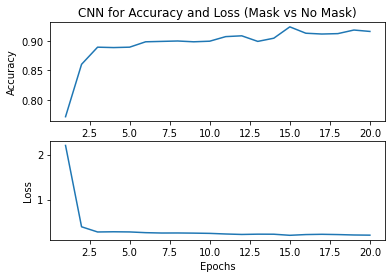

In [13]:
epochs1 = list(range(1, len(hist1.history['acc'])+1))
accuracy1 = hist1.history['acc']
loss1 = hist1.history['loss']

plt.subplot(2,1,1)
plt.plot(epochs1, accuracy1)
plt.title("CNN for Accuracy and Loss (Mask vs No Mask)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(2,1,2)
plt.plot(epochs1, loss1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Building second model (With Transfer Learning)

In [14]:
base=InceptionResNetV2(input_shape = (150,150,3) , weights = 'imagenet' , include_top = False)

219070464/219055592 [==============================] - 2s 0us/step


In [15]:
model2 = models.Sequential()
model2.add(base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(2, activation='softmax'))
base.trainable = False

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 57,876,450
Trainable params: 3,539,714
Non-trainable params: 54,336,736
_________________________________________________________________


In [17]:
batch_size = 32
epochs = 20
model2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
hist2 = model2.fit(tr_gen, steps_per_epoch=tr_x.shape[0] // batch_size, epochs=epochs)

Epoch 1/20
93/93 [==============================] - 26s 180ms/step - loss: 0.7497 - acc: 0.9272
Epoch 2/20
93/93 [==============================] - 16s 176ms/step - loss: 0.2796 - acc: 0.9518
Epoch 3/20
93/93 [==============================] - 16s 176ms/step - loss: 0.1868 - acc: 0.9545
Epoch 4/20
93/93 [==============================] - 16s 174ms/step - loss: 0.0906 - acc: 0.9673
Epoch 5/20
93/93 [==============================] - 17s 184ms/step - loss: 0.0986 - acc: 0.9680
Epoch 6/20
93/93 [==============================] - 16s 173ms/step - loss: 0.0654 - acc: 0.9784
Epoch 7/20
93/93 [==============================] - 17s 182ms/step - loss: 0.0721 - acc: 0.9751
Epoch 8/20
93/93 [==============================] - 16s 169ms/step - loss: 0.0737 - acc: 0.9744
Epoch 9/20
93/93 [==============================] - 16s 176ms/step - loss: 0.0767 - acc: 0.9734
Epoch 10/20
93/93 [==============================] - 17s 186ms/step - loss: 0.0631 - acc: 0.9764
Epoch 11/20
93/93 [====================

In [18]:
results2 = model2.evaluate(test_gen, batch_size = 32)
print("Test loss and test accuracy: ", results2)

27/27 [==============================] - 9s 187ms/step - loss: 0.0590 - acc: 0.9820
Test loss and test accuracy:  [0.059047479182481766, 0.981992781162262]


# Saving the second model

In [19]:
model2.save('model_2.h5')

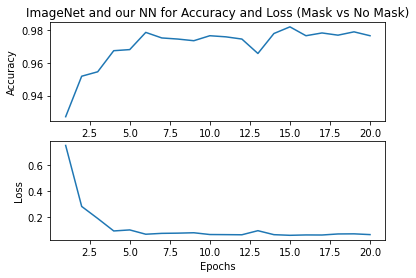

In [20]:
epochs2 = list(range(1, len(hist2.history['acc'])+1))
accuracy2 = hist2.history['acc']
loss2 = hist2.history['loss']


plt.subplot(2,1,1)
plt.plot(epochs2, accuracy2)
plt.title("ImageNet and our NN for Accuracy and Loss (Mask vs No Mask)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(2,1,2)
plt.plot(epochs2, loss2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Making Predictions

In [21]:
# Taking any random image and classifying it. 

from tensorflow.keras.preprocessing import image
img_path = "../input/random-img/anastasiia-chepinska-eGjHhmC_3ww-unsplash.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [22]:
model2.predict(img_batch)

array([[0., 1.]], dtype=float32)